In [39]:
import numpy as np
import base64
from PIL import Image
import io


def cifar10_to_base64_images(img_arr):
    # Create an empty list to hold the base64-encoded image strings
    img_base64_list = []
    # Loop over each image in the array
    for i in range(img_arr.shape[0]):
        # Convert the NumPy array to a PIL Image object
        img = Image.fromarray(np.uint8(img_arr[i] * 255))
        # Create a BytesIO object to hold the image data
        img_bytes = io.BytesIO()
        # Save the image to the BytesIO object in PNG format
        img.save(img_bytes, format='PNG')
        # Encode the image data in base64
        img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
        # Append the base64-encoded image string to the list
        img_base64_list.append(img_base64)
    # Return the list of base64-encoded image strings
    return img_base64_list

def numpy_to_base64_image(arr, resize=None):
    # Reshape the 1D array to a 3D array of shape (32, 32, 3)
    arr = np.uint8(arr * 255)
    img_arr = arr.reshape((3, 32, 32)).transpose([1, 2, 0]) 
    if resize:
        img = Image.fromarray(img_arr)
        resized_img_pil = img.resize(resize)
        img_arr = np.array(resized_img_pil)
    # Convert the NumPy array to a PIL Image object
    img = Image.fromarray(img_arr)
    # Create a BytesIO object to hold the image data
    img_bytes = io.BytesIO()
    # Save the image to the BytesIO object in PNG format
    img.save(img_bytes, format='PNG')
    # Encode the image data in base64
    img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
    # Return the base64-encoded image string
    return img_base64

In [40]:
import h5py
import numpy as np
f = h5py.File('CIFAR11_dataset.mat','r')
data = f.get('Xtrain')
data = np.array(data)
print(data.shape)

(55000, 3072)


(3072,)
iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAIAAABMXPacAABHaElEQVR4nK2963okO64ltgCQjExJtXefbzzP5X9+Ab+/PaerlJkRJAD/AMgIqarPtMeOVmurpFQqAncsXEj/+//xfwIAwEQAiBgAERGICAAc7nDAATCBCMIQ4SayNa5FWi21cq2ltbJt2/3+/vb2sW1vrVUiInIiZ3Yiis9ExFyIBSRDMQ7d+3i9+r6P53N/7vvrdfSjj6FqOszGsD50DFO1oW5mcHd3ImLhKqXU0lptbbvdb7fb1lqr29baVlqT0qQ0kkIg96H7c+w/+/Of43j049fYP0d/6tjhnWBu7q5mpqaq1ofte9+P0RUEqe223d5v9/fWbm3btrbVWkspzBzEcnciwOEAAPO8zOFu+RXi3gFQkL0kmXF+69+5CEh+Ja/in8k0n38oWejunq9fv0MgBxGBmImImUVYRIpILeLmAJERmREMIIIRGchMYe5uRvPWPf+Eu83LzdzNnc3gBjiBHCCKO08xWF+4c0iYh7iZz/fweIB/hzZEF1peqElfP327yv8run/9e2AGM/Hlih+5m5macehVCMf8PY4PYiZiB4lQKW5G7mTmIBBxKSM0QJcGdBuqfdgYqqqm6pMubqZfLx6qPIiZwCwqJmAwAMK8UxERl2JW3NRhbg6oO8xMNd7QTNXM/m0SJZXp/Ed84edX/v13CvN8pX/hks9Pji+/RADBmcAEZhKhIlSEReLBCDBzVR2UT0tMAJhofQixEBWSQgwmJxZhraW2Wrc++n3osJE0sD6sjzG69qHHMY6jH70fx1AdGgbDzd2AFGmE1ocUtzB9TFSInJic2UshK/AGHXAjdx0wz98Yw0YfffQxdAwzdQcT+RcSfJXEMEGpAZNeDDiFPuW/QE6U9mBRtTDJfKOwHMkLSvU7mTZNiBOByZmpCJfCpUopUgqHPQTcbIxB7ioizCwcfoWZGRS0KCyVpYAI

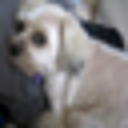

In [45]:

# Assuming your 1D NumPy array of shape (3072,) containing a single CIFAR-10 image
image_array = data[-2]

# Check the shape of the array
print(image_array.shape)  # Output: (3072,)

base64_str = numpy_to_base64_image(image_array, resize=(128, 128))

print(base64_str)

from IPython.display import display, Image
import base64
from PIL import Image as PilImage
from io import BytesIO

# assume the base64 string is stored in the variable "base64_string"
# decode the base64 string to bytes
img_bytes = base64.b64decode(base64_str)

# read the bytes as an image using PIL (Python Imaging Library)
img = PilImage.open(BytesIO(img_bytes))

# display the image
display(img)

iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAIAAABMXPacAABHaElEQVR4nK2963okO64ltgCQjExJtXefbzzP5X9+Ab+/PaerlJkRJAD/AMgIqarPtMeOVmurpFQqAncsXEj/+//xfwIAwEQAiBgAERGICAAc7nDAATCBCMIQ4SayNa5FWi21cq2ltbJt2/3+/vb2sW1vrVUiInIiZ3Yiis9ExFyIBSRDMQ7d+3i9+r6P53N/7vvrdfSjj6FqOszGsD50DFO1oW5mcHd3ImLhKqXU0lptbbvdb7fb1lqr29baVlqT0qQ0kkIg96H7c+w/+/Of43j049fYP0d/6tjhnWBu7q5mpqaq1ofte9+P0RUEqe223d5v9/fWbm3btrbVWkspzBzEcnciwOEAAPO8zOFu+RXi3gFQkL0kmXF+69+5CEh+Ja/in8k0n38oWejunq9fv0MgBxGBmImImUVYRIpILeLmAJERmREMIIIRGchMYe5uRvPWPf+Eu83LzdzNnc3gBjiBHCCKO08xWF+4c0iYh7iZz/fweIB/hzZEF1peqElfP327yv8run/9e2AGM/Hlih+5m5macehVCMf8PY4PYiZiB4lQKW5G7mTmIBBxKSM0QJcGdBuqfdgYqqqm6pMubqZfLx6qPIiZwCwqJmAwAMK8UxERl2JW3NRhbg6oO8xMNd7QTNXM/m0SJZXp/Ed84edX/v13CvN8pX/hks9Pji+/RADBmcAEZhKhIlSEReLBCDBzVR2UT0tMAJhofQixEBWSQgwmJxZhraW2Wrc++n3osJE0sD6sjzG69qHHMY6jH70fx1AdGgbDzd2AFGmE1ocUtzB9TFSInJic2UshK/AGHXAjdx0wz98Yw0YfffQxdAwzdQcT+RcSfJXEMEGpAZNeDDiFPuW/QE6U9mBRtTDJfKOwHMkLSvU7mTZNiBOByZmpCJfCpUopUgqHPQTcbIxB7ioizCwcfoWZGRS0KCyVpYAIhaqbNTdz

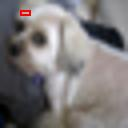

In [48]:
import base64
from io import BytesIO
from PIL import Image, ImageDraw

print(base64_str)

class Position:
    def __init__(self, top, left, height, width):
        self.top = top
        self.left = left
        self.height = height
        self.width = width

def draw_rectangle_on_image(base64_str, position_obj):
    # decode the base64 string into a bytes object
    img_bytes = base64.b64decode(base64_str)
    
    # create a PIL image object from the bytes object
    img = Image.open(BytesIO(img_bytes))

    # create a drawing object
    draw = ImageDraw.Draw(img)

    # define the coordinates of the rectangle
    top = position_obj.top
    left = position_obj.left
    bottom = top + position_obj.height
    right = left + position_obj.width

    # draw the rectangle
    draw.rectangle((left, top, right, bottom), outline='red', width=2)

    # encode the image as a base64 string and return it
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode()
    return img_str


# create a Position object
position = Position(top=10, left=20, height=5, width=10)


# call the function to draw a rectangle on the image
new_base64_str = draw_rectangle_on_image(base64_str, position)

img_bytes = base64.b64decode(new_base64_str)

# read the bytes as an image using PIL (Python Imaging Library)
img = PilImage.open(BytesIO(img_bytes))

# display the image
display(img)

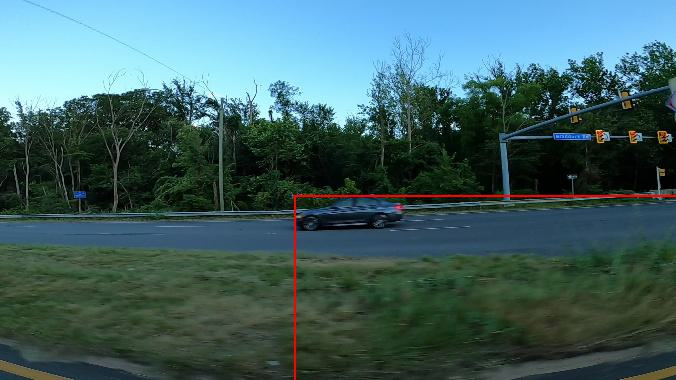

In [52]:
import json
import pickle
from result import ImageClassificationResult, ObjectDetectionResult, Position

filename = 'results'
with open(filename, 'rb') as file:
    result_list = pickle.load(file)
result = result_list[0]


def base64_to_image(base64_str):
    img_bytes = base64.b64decode(base64_str)

    # read the bytes as an image using PIL (Python Imaging Library)
    img = PilImage.open(BytesIO(img_bytes))

    # display the image
    display(img)

class ResultEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, ImageClassificationResult):
            return {"success": True, "base64_str": obj.base64_str, "class_name": obj.class_name, "score": obj.score, "message": "Image Classification Result"}
        elif isinstance(obj, ObjectDetectionResult):
            return {
                "success": True,
                "base64_str": obj.base64_str,
                "class_name": obj.class_name,
                "score": obj.score,
                "position": json.dumps(obj.position, cls=ResultEncoder)
            }
        elif isinstance(obj, Position):
            return {
                "left": obj.left,
                "top": obj.top,
                "height": obj.height,
                "width": obj.width
            }
        return super().default(obj)
    
def write_json(result):
    data = json.dumps(result, cls=ResultEncoder)

    # load as dict
    json_dict = json.loads(data)
    json_dict_position = json.loads(json_dict["position"])
    del json_dict['position']
    json_dict['position'] = json_dict_position

    # write pretty JSON to file
    with open('formatted.json','w') as formatted_file: 
        json.dump(json_dict, formatted_file, indent=4)  

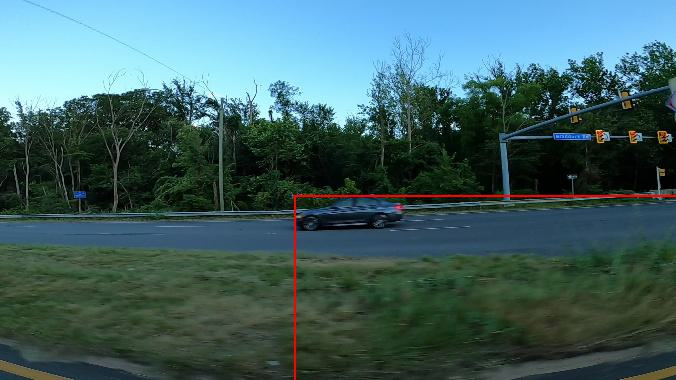

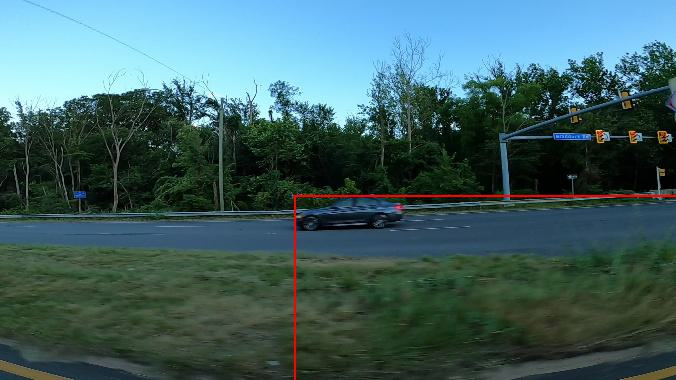

In [53]:
base64_to_image(result.base64_str)
base64_to_image(result_list[1].base64_str)

In [25]:
import base64
from PIL import Image
from io import BytesIO

# assume the base64 string is stored in the variable "base64_string"

# decode the base64 string to bytes
img_bytes = base64.b64decode(base64_str)

# read the bytes as an image using PIL (Python Imaging Library)
img = Image.open(BytesIO(img_bytes))

# show the image
img.show()


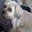

In [26]:
from IPython.display import display, Image
import base64
from PIL import Image as PilImage
from io import BytesIO

# assume the base64 string is stored in the variable "base64_string"
# decode the base64 string to bytes
img_bytes = base64.b64decode(base64_str)

# read the bytes as an image using PIL (Python Imaging Library)
img = PilImage.open(BytesIO(img_bytes))

# display the image
display(img)


(3072,)


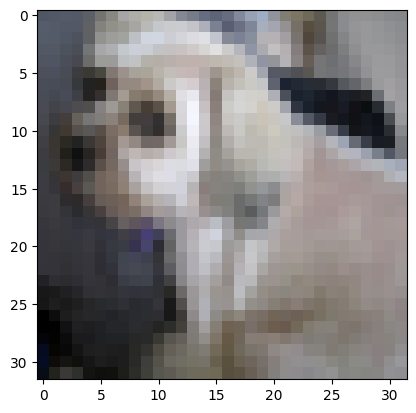

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Assuming your 1D NumPy array of shape (3072,) containing a single CIFAR-10 image
image_array = data[-2]

# Check the shape of the array
print(image_array.shape)  # Output: (3072,)

img = image_array.reshape(3,32,32).transpose([1, 2, 0]) 
plt.imshow(img)
plt.show()